In [6]:
import warnings
warnings.filterwarnings("ignore")
import control as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import plotly.offline as py
s=c.tf([1,0],1)

Izan bedi planta bat, bere transferentzia funtzioa hau izanik:
        
$$G(s)=\frac{(s+5)}{(s+1)(s^{2}+s+50)}$$

Erabili nahi da PD kontrolagailu bat, bere prezisioa kontrolatuz. Prezisioa zehaztuta dago maila sarreraren aurrean lortutako egonkorreko posizio-errorearen bitartez: $e_{ss}=0.1$. Kontrolagailuaren ekuazioa da $G_{pd}(s)=K(1+T_{d}s)$.

1. Kalkulatu K-ren balioa eskatutako prezisioa lortzeko.
      
2. K finkatuta, aztertu sistemaren dinamika $T_{d}$-ren arabera, Erroen Kontornoaren bitartez.
      
3. Aukeratu $T_{d}$ parametroaren balioa, espezifikazio hauek betetzeko: 
    + Gaindiketa $R<\%10$       
    + Puntako denbora $T_{1}<0.4s$.
       
4. Baloratu diseinuaren emaitza (denbora erantzuna, kontrol seinalea, ...)

**Oharra**: Ez bada lortu Erroen Kontornoa 2. atalean, egin 3. ataleko diseinua ohiko teknika erabiliz.

1- Kalkulatu K-ren balioa eskatutako prezisioa lortzeko.

In [8]:
#Definituion of the TF
g1=(s+5)/(s+1)/(s**2+s+50)
ess=0.1
Kp=(1-ess)/ess
K=(Kp/g1.horner(0))[0][0].real
print('Lehengo espezifikaziotik', 'Kp= ',Kp,'K= ',K)

Lehengo espezifikaziotik Kp=  9.0 K=  90.0


2- K finkatuta, aztertu sistemaren dinamika $T_d$ -ren arabera, Erroen Kontornoaren bitartez.

----
Lehengo, ekuazio laguntzailea lortzen da, ekuazio karakteristikoa berridatziz
$$1+T_d F(s)=0$$

In [9]:
Td=1
p1=(1+(1+Td*s)*K*g1).num
Td=0
p0=(1+(1+Td*s)*K*g1).num
F=c.tf(p1[0][0]-p0[0][0],p0[0][0])
print('Lortutako TF laguntzailea:',F)

Lortutako TF laguntzailea: 
      90 s^2 + 450 s
-------------------------
s^3 + 2 s^2 + 141 s + 500



Orain Erroen kontornoa egiten da F erabiliz

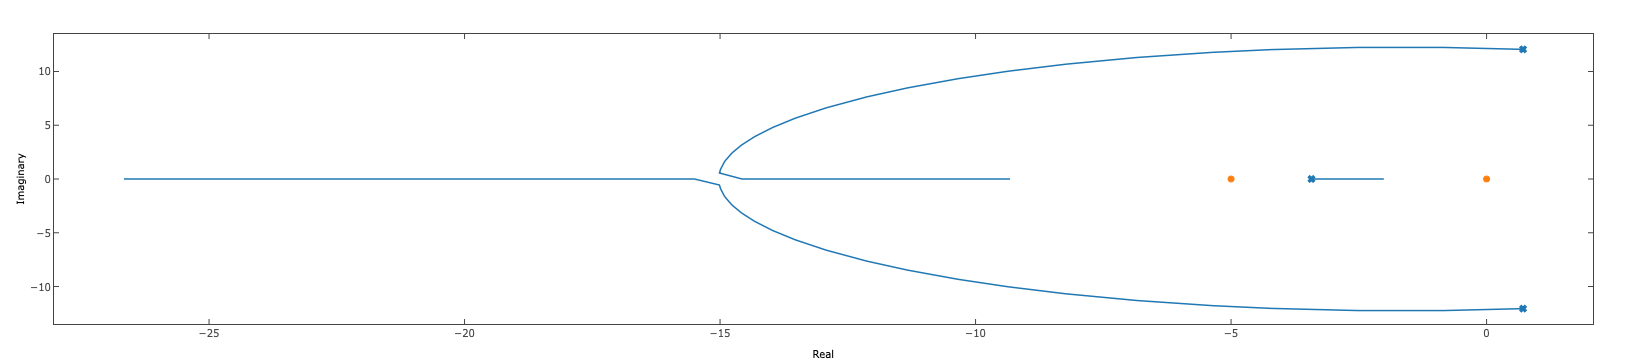

In [4]:
c.rlocus(F,kvect=sp.r_[0:0.40:0.0005,0.4:0.5:0.1])
f=plt.gcf();py.iplot_mpl(f)

Hasteko, gogoratu behar da jatorrian dagoen zero ez dela zeroa eta beste bat erantzi behar dela -1/Td puntuan.
- Ikusten denez, Td txikientzako sistema ezegonkorra da.
- Egonkortu eta gero hasieran sistema oso oszilakorra da, nahiz eta Td handituz, plo erreal bat joango da indartzen eta polo konplexu konjukatuak joango dira galtzen bere oszilakortasuna, abidura mantenduz. Td=0.2 denerako poloek oszilakortasuna nahiko galdu dute,baina dagokion zeroa -5 puntuan dago, bi zeroak hor eginik eta konpentzatuz -0.25 inguruan  dagoen poloa
- Td gehiago handituz polo hurbilena errela izango da, baina -1/Td zeroa oso gertu. Beraz -5n dagoen zero eragin  handia izango du, gaindiketa egonik, sistema gero eta azkarragoa izan arren hasieran (beste bi poloak). Td altuagoetan polo erreal bat -5 dagoen zeroa ere konpentsatzera joko du.

Td altuetan dinamika nolakoa den jakiteko, denbora eremuko simulazioak egin daitezke

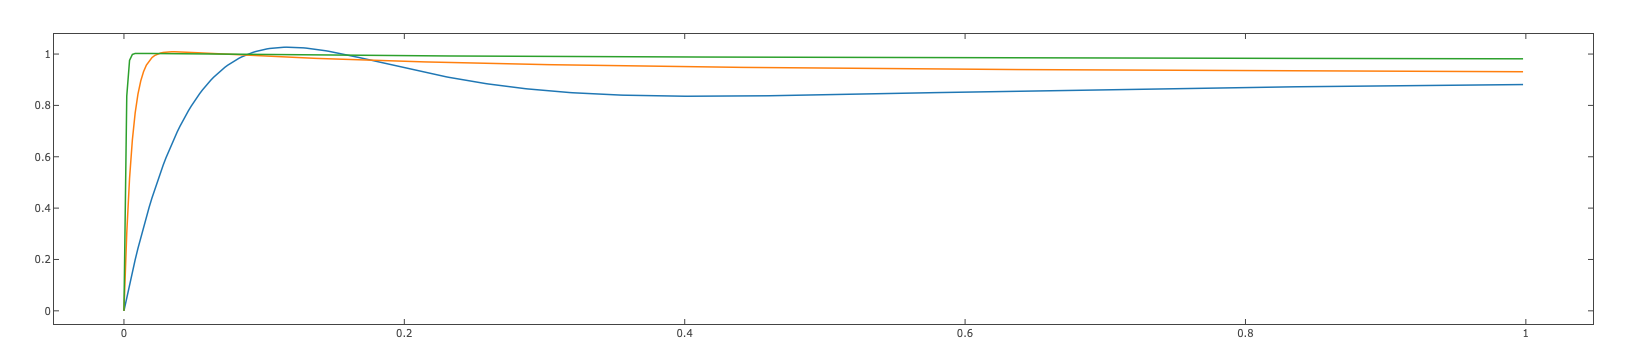

In [5]:
t=sp.r_[0:1:0.002]
Td=0.3
gi=c.feedback(K*(1+Td*s)*g1)
t,y=c.step_response(gi,t)
Td=2
gi=c.feedback(K*(1+Td*s)*g1)
t1,y1=c.step_response(gi,t)
Td=10
gi=c.feedback(K*(1+Td*s)*g1)
t2,y2=c.step_response(gi,t)
plt.plot(t,y,t1,y1,t2,y2)
f=plt.gcf();py.iplot_mpl(f)

Ikusten da hasieran plo askarra dela nagusia, gaindileta egonik zeroagatik eta dinamika gero motelki egonkortzen da, polo-zero bikoteagatik

3- Aukeratu $T_d$ parametroaren balioa, espezifikazio hauek betetzeko:
* Gaindiketa $R<\%10$
 
* Puntako denbora $T_1<0.4s.$

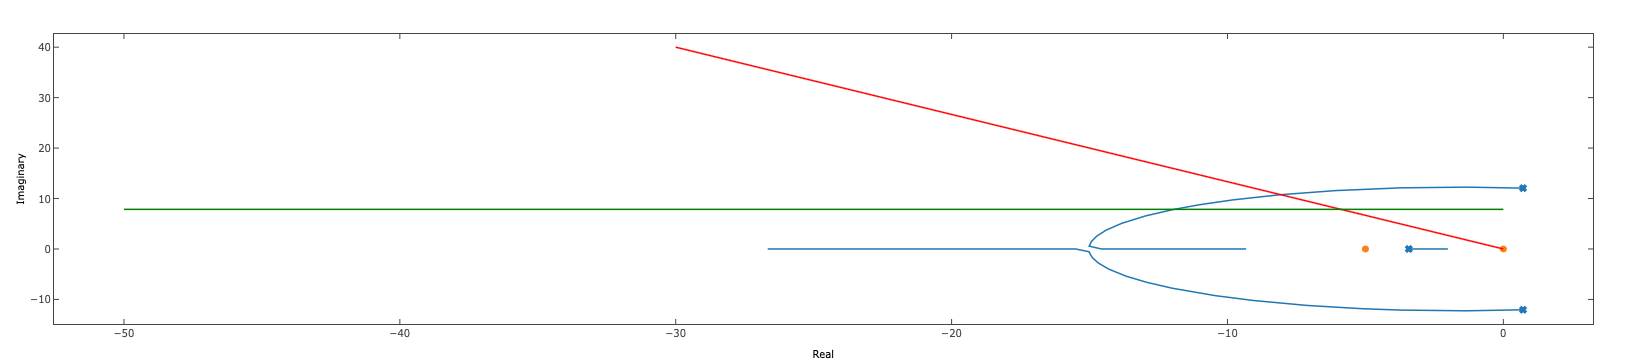

In [6]:
d=0.6;T1=0.4;wd=sp.pi/T1
p1=(-d+sp.sqrt(d**2-1))*sp.r_[0,50]
p2=-sp.r_[0,50]+wd*1j
c.rlocus(F,kvect=sp.r_[0:0.40:0.0005,0.4:0.5:0.1])
plt.plot(p1.real,p1.imag,'r')
plt.plot(p2.real,p2.imag,'g')
f=plt.gcf();py.iplot_mpl(f)

Emaitza ikusita eta aurreko eztabaidatik $T_d=0.3-0.5$ egokiak izan daitezke

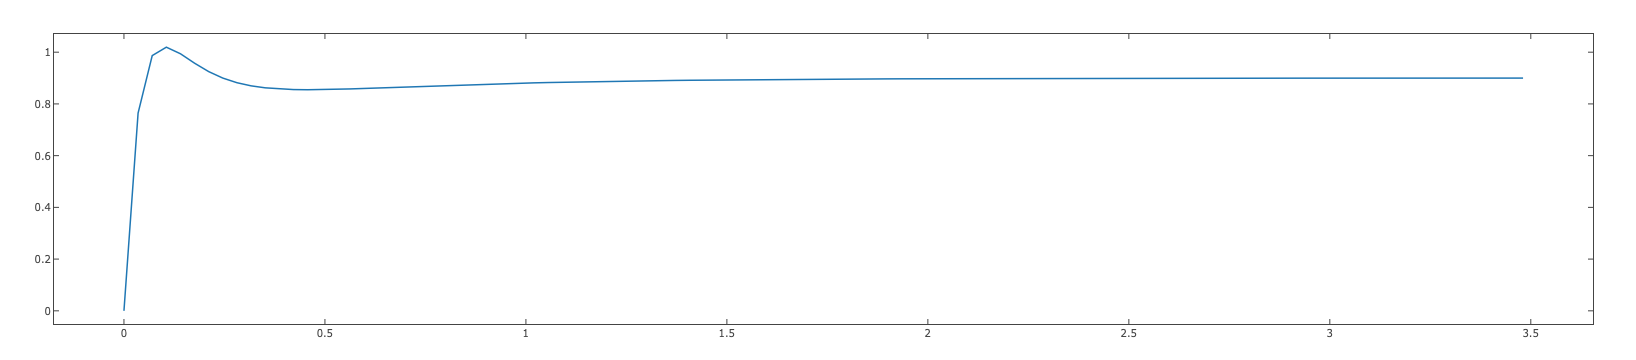

Gaindiketa= % 0.13261111111111107


In [8]:
Td=0.4
gi=c.feedback(K*(1+Td*s)*g1)
t,y=c.step_response(gi)
plt.plot(t,y)
f=plt.gcf();py.iplot_mpl(f)
print('Gaindiketa= %', (1.01935-0.9)/0.9)

Dena den, gaindiketaren espazifikazioa horrala ezin da bete, abiadurarena aise betetzen.

Aztertu daiteke Kren arabera zer gertatzen den (prezisioa kaltetu gabe)

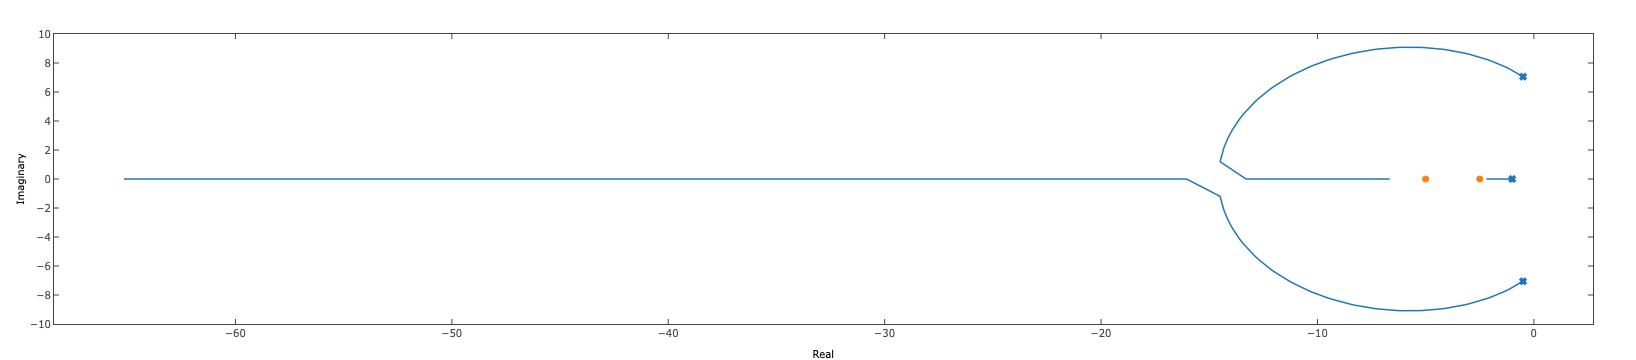

In [9]:
c.rlocus(K*(1+Td*s)*g1,sp.linspace(0,2,200))
f=plt.gcf();py.iplot_mpl(f)

Argi ikusten da nola sistema azkarragoa egiten dela K handituz, oszilakortasuna hobetuz. Adibidez, frogatu daiteke K=2

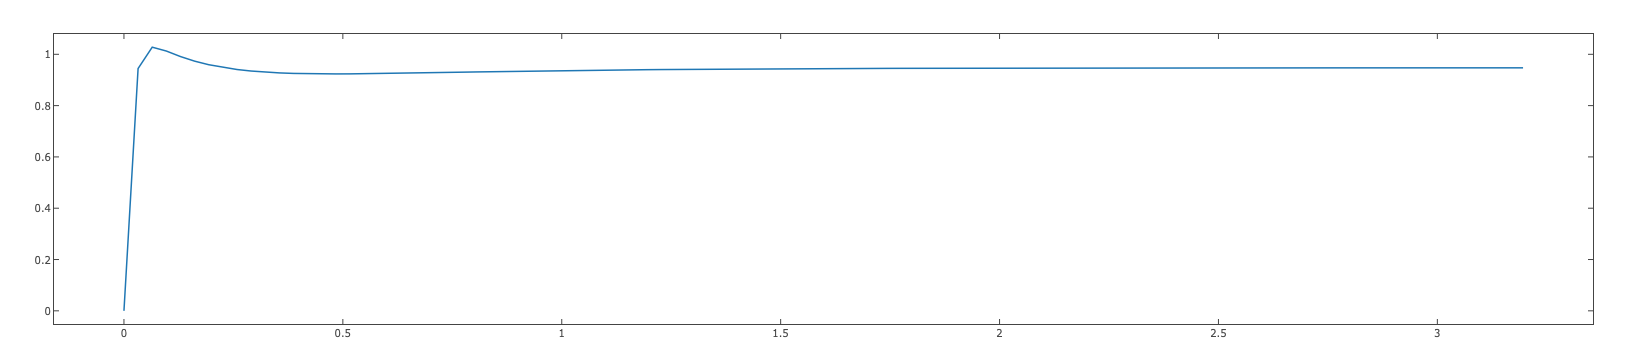

Gaindiketa= % 0.08447729672650471


In [11]:
gi=c.feedback(2*K*(1+Td*s)*g1)
t,y=c.step_response(gi)
plt.plot(t,y)
f=plt.gcf();py.iplot_mpl(f)
print('Gaindiketa= %', (1.027-0.947)/0.947)

Falta da aztertzea kontrol seinalea. Kontutan hartuko dugu bi aukerak, K=90, K=180

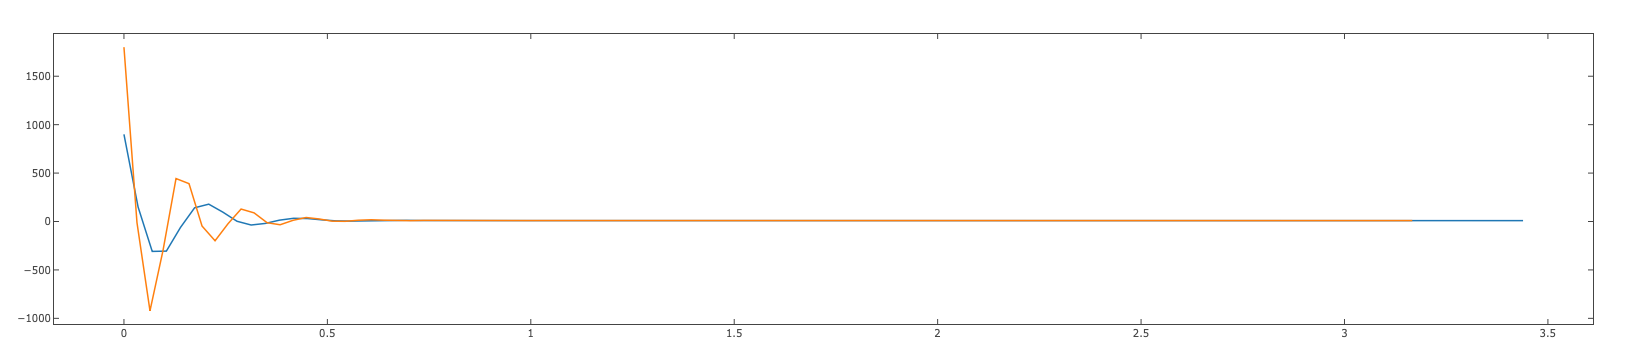

In [12]:
gu=c.feedback(K*(1+Td*s)/(1+Td*s*0.1),g1)
gu1=c.feedback(2*K*(1+Td*s)/(1+Td*s*0.1),g1)
t,u=c.step_response(gu)
t1,u1=c.step_response(gu1)
plt.plot(t,u,t1,u1)
f=plt.gcf();py.iplot_mpl(f)

Ikusten denez kontrol seinalea altua da, nahiz eta baloratzeko ondo zentzu fisikoa ezagutu behar den. Dena den K gera eta altuagoa, kontrol seinalea ere altuagoa da. Beraz, ohikoa ikusten da: mitza dinamiko hobea lortzeko kontrol esfortzu handiagia behar da

In [1]:
from IPython.display import IFrame

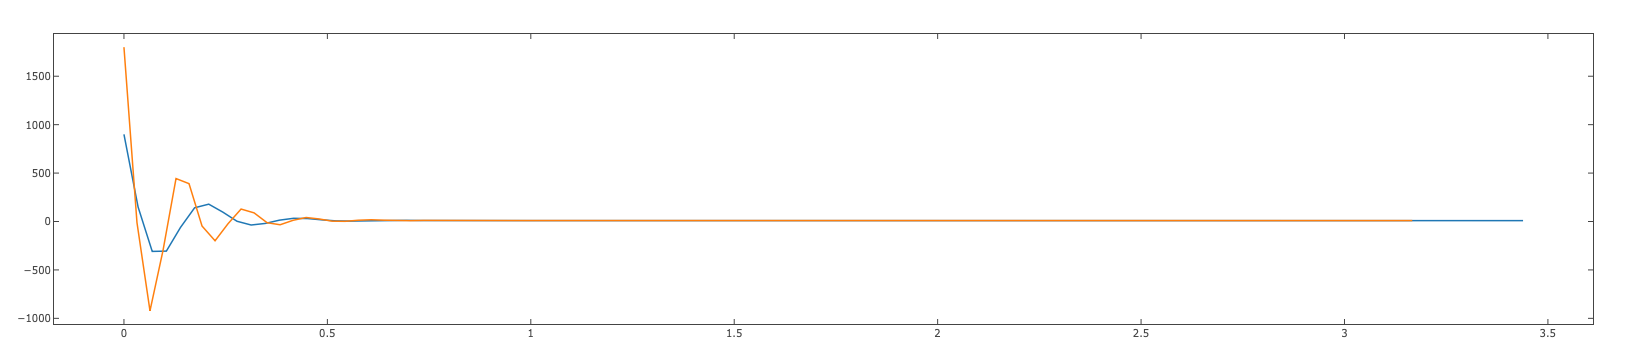

In [20]:
Td=0.4
gu=c.feedback(K*(1+Td*s)/(1+Td*s*0.1),g1)
gu1=c.feedback(2*K*(1+Td*s)/(1+Td*s*0.1),g1)
t,u=c.step_response(gu)
t1,u1=c.step_response(gu1)
plt.plot(t,u,t1,u1)
f=plt.gcf();IFrame(py.iplot_mpl(f),width="10%", height="6px", frameBorder="10")